In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("advertising.csv")

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor',
                'GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [8]:
x,y=df.drop("Sales",axis=1),df[["Sales"]]

In [9]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.983603,0.719405,0.614828
ExtraTreeRegressor,0.974005,0.905815,0.690000
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
LinearRegression,0.899438,1.781600,1.460757


In [ ]:
# With deep learning

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

2022-11-21 15:00:08.965092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
x=scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [13]:
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [14]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 1s 214ms/step - loss: 224.2479 - val_loss: 215.2711
Epoch 2/1500
2/2 [==============================] - 0s 31ms/step - loss: 219.2555 - val_loss: 201.2247
Epoch 3/1500
2/2 [==============================] - 0s 30ms/step - loss: 203.3740 - val_loss: 160.9614
Epoch 4/1500
2/2 [==============================] - 0s 28ms/step - loss: 157.7658 - val_loss: 72.0777
Epoch 5/1500
2/2 [==============================] - 0s 33ms/step - loss: 63.4552 - val_loss: 42.0464
Epoch 6/1500
2/2 [==============================] - 0s 28ms/step - loss: 38.5598 - val_loss: 40.3087
Epoch 7/1500
2/2 [==============================] - 0s 30ms/step - loss: 25.7744 - val_loss: 13.6388
Epoch 8/1500
2/2 [==============================] - 0s 30ms/step - loss: 13.3065 - val_loss: 29.7983
Epoch 9/1500
2/2 [==============================] - 0s 32ms/step - loss: 30.4683 - val_loss: 29.1322
Epoch 10/1500
2/2 [==============================] - 0s 34ms/step - loss: 28.1864 -

2/2 [==============================] - 0s 27ms/step - loss: 0.0902 - val_loss: 0.4110
Epoch 164/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0888 - val_loss: 0.3912
Epoch 165/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0853 - val_loss: 0.3597
Epoch 166/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0872 - val_loss: 0.3550
Epoch 167/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0825 - val_loss: 0.3830
Epoch 168/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.0847 - val_loss: 0.3908
Epoch 169/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.0864 - val_loss: 0.3889
Epoch 170/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.0871 - val_loss: 0.3596
Epoch 171/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0822 - val_loss: 0.3853
Epoch 172/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0901 - val_loss: 0.4478
Epoch

2/2 [==============================] - 0s 28ms/step - loss: 0.0648 - val_loss: 0.3417
Epoch 326/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0564 - val_loss: 0.4123
Epoch 327/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0594 - val_loss: 0.4246
Epoch 328/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0562 - val_loss: 0.3634
Epoch 329/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0543 - val_loss: 0.3430
Epoch 330/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0602 - val_loss: 0.3924
Epoch 331/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0659 - val_loss: 0.4189
Epoch 332/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0649 - val_loss: 0.4685
Epoch 333/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0732 - val_loss: 0.4002
Epoch 334/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0613 - val_loss: 0.4059
Epoch

2/2 [==============================] - 0s 29ms/step - loss: 0.0571 - val_loss: 0.3252
Epoch 488/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0543 - val_loss: 0.3201
Epoch 489/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0512 - val_loss: 0.3692
Epoch 490/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0647 - val_loss: 0.3243
Epoch 491/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0551 - val_loss: 0.2717
Epoch 492/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0645 - val_loss: 0.3094
Epoch 493/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0653 - val_loss: 0.4019
Epoch 494/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.0921 - val_loss: 0.4721
Epoch 495/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.1168 - val_loss: 0.3534
Epoch 496/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0768 - val_loss: 0.3413
Epoch

2/2 [==============================] - 0s 28ms/step - loss: 0.0471 - val_loss: 0.3287
Epoch 650/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0533 - val_loss: 0.3270
Epoch 651/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0432 - val_loss: 0.3531
Epoch 652/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0497 - val_loss: 0.3247
Epoch 653/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0476 - val_loss: 0.2954
Epoch 654/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0421 - val_loss: 0.2891
Epoch 655/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0391 - val_loss: 0.3097
Epoch 656/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0406 - val_loss: 0.3465
Epoch 657/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0614 - val_loss: 0.3363
Epoch 658/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0551 - val_loss: 0.3157
Epoch

2/2 [==============================] - 0s 26ms/step - loss: 0.1011 - val_loss: 0.4188
Epoch 812/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0644 - val_loss: 0.4979
Epoch 813/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1035 - val_loss: 0.5028
Epoch 814/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1102 - val_loss: 0.4259
Epoch 815/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0594 - val_loss: 0.4662
Epoch 816/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0832 - val_loss: 0.4606
Epoch 817/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1080 - val_loss: 0.3624
Epoch 818/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0554 - val_loss: 0.3805
Epoch 819/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0666 - val_loss: 0.4010
Epoch 820/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0507 - val_loss: 0.4129
Epoch

2/2 [==============================] - 0s 25ms/step - loss: 0.2840 - val_loss: 0.6338
Epoch 974/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2075 - val_loss: 0.4872
Epoch 975/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0986 - val_loss: 0.3532
Epoch 976/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0953 - val_loss: 0.4465
Epoch 977/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1337 - val_loss: 0.2762
Epoch 978/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0668 - val_loss: 0.2466
Epoch 979/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0636 - val_loss: 0.2621
Epoch 980/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0671 - val_loss: 0.2396
Epoch 981/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0742 - val_loss: 0.2479
Epoch 982/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0485 - val_loss: 0.2541
Epoch

2/2 [==============================] - 0s 50ms/step - loss: 0.0809 - val_loss: 0.6825
Epoch 1134/1500
2/2 [==============================] - 0s 54ms/step - loss: 0.2749 - val_loss: 0.3682
Epoch 1135/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1694 - val_loss: 0.2911
Epoch 1136/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0699 - val_loss: 0.3992
Epoch 1137/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.1064 - val_loss: 0.2977
Epoch 1138/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0705 - val_loss: 0.3505
Epoch 1139/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0704 - val_loss: 0.4121
Epoch 1140/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0772 - val_loss: 0.4801
Epoch 1141/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.1080 - val_loss: 0.5815
Epoch 1142/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.2041 - val_loss: 0.3

2/2 [==============================] - 0s 28ms/step - loss: 0.0416 - val_loss: 0.5380
Epoch 1294/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0907 - val_loss: 0.4198
Epoch 1295/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0406 - val_loss: 0.3936
Epoch 1296/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0447 - val_loss: 0.4419
Epoch 1297/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0637 - val_loss: 0.4321
Epoch 1298/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.0554 - val_loss: 0.4570
Epoch 1299/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0482 - val_loss: 0.4991
Epoch 1300/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0474 - val_loss: 0.5607
Epoch 1301/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0680 - val_loss: 0.6013
Epoch 1302/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1545 - val_loss: 0.4

2/2 [==============================] - 0s 27ms/step - loss: 0.1095 - val_loss: 0.5513
Epoch 1454/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0468 - val_loss: 0.5578
Epoch 1455/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0425 - val_loss: 0.5367
Epoch 1456/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0535 - val_loss: 0.4794
Epoch 1457/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0528 - val_loss: 0.4671
Epoch 1458/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0419 - val_loss: 0.4915
Epoch 1459/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0338 - val_loss: 0.5603
Epoch 1460/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0663 - val_loss: 0.5485
Epoch 1461/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.0541 - val_loss: 0.5090
Epoch 1462/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0333 - val_loss: 0.5

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               800       
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 200)               40200     
                                                                 
 dense_12 (Dense)            (None, 200)               40200     
                                                                 
 dense_13 (Dense)            (None, 200)               40200     
                                                                 
 dense_14 (Dense)            (None, 200)               40200     
                                                                 
 dense_15 (Dense)            (None, 200)              

<AxesSubplot:>

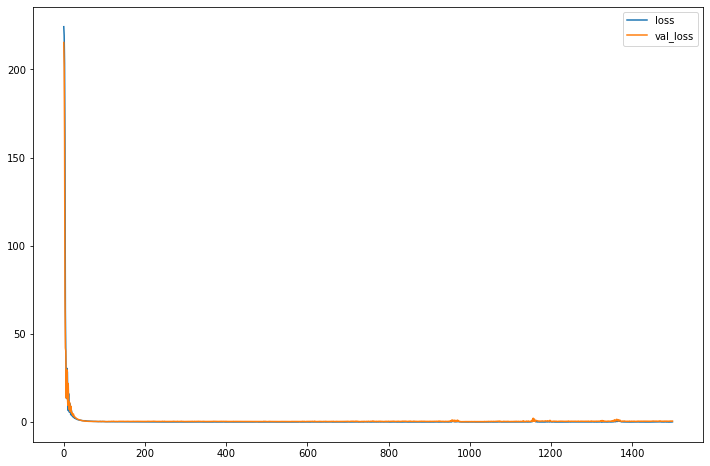

In [16]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [17]:
pred=model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [18]:
(mean_squared_error(y_test,pred))**.5

0.7538101095839397

In [19]:
r2_score(y_test,pred) 

0.9819973072200959